### IMPORT

In [1]:
# Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization
import seaborn as sns

# Clustering Algorithms
from sklearn.cluster import DBSCAN

# PCA
from sklearn.decomposition import PCA

# sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### DATA

In [2]:
df = pd.read_csv('/content/df_censored.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      331 non-null    int64  
 1   area_name       331 non-null    object 
 2   property_id     331 non-null    object 
 3   property_name   331 non-null    object 
 4   property_type   331 non-null    object 
 5   unit_id         331 non-null    object 
 6   unit_name       331 non-null    object 
 7   unit_type       331 non-null    object 
 8   bedroom         331 non-null    float64
 9   bathroom        331 non-null    float64
 10  beds            331 non-null    float64
 11  wifi            331 non-null    float64
 12  tv              331 non-null    float64
 13  ac              331 non-null    float64
 14  parking         331 non-null    float64
 15  pool            331 non-null    float64
 16  breakfast       331 non-null    float64
 17  building_staff  331 non-null    flo

,Unnamed: 0,area_name,property_id,property_name,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,...,overall_rating,comp1,comp2,comp3,comp4,comp5,comp6,comp7,cluster,desc
0,0,Sanur,PR0837,Property no. 42,Guesthouse,UN3085,Mimo,1BR Queen (Mimo),1.0,1.0,...,4.968254,0.133632,-0.210699,-0.131964,0.003975,0.000915,-0.078112,0.135850,1,Guesthouse unit 1BR Queen (Mimo) di Sanur deng...
1,1,Mengwi,PR0791,Property no. 60,Guesthouse,UN3014,Room 4,Regular first floor,1.0,1.0,...,4.955357,0.126164,-0.237839,-0.121789,-0.036404,-0.097057,-0.044626,0.103566,1,Guesthouse unit Regular first floor di Mengwi ...
2,2,Mengwi,PR0791,Property no. 60,Guesthouse,UN3009,Room 12,Loft second floor,1.0,1.0,...,4.946429,0.127377,-0.237870,-0.120469,-0.037198,-0.096350,-0.043828,0.102842,1,Guesthouse unit Loft second floor di Mengwi de...
3,3,Uluwatu,PR0809,Property no. 57,Guesthouse,UN3051,Standard - Room 1,Standard,1.0,1.0,...,4.937500,0.139688,-0.190636,-0.138269,0.031532,0.069180,-0.100461,0.155616,1,Guesthouse unit Standard di Uluwatu dengan 1 k...
4,4,Canggu,PR0650,Property no. 55,Guesthouse,UN2693,1,Guesthouse,1.0,1.0,...,4.935065,0.355437,0.221148,-0.106624,-0.259566,-0.336711,-0.266739,0.157439,1,Guesthouse unit Guesthouse di Canggu dengan 1 ...


In [7]:
df_nout = df[['area_name',
         'price_per_unit', 'overall_rating', 'bedroom',
         'bathroom', 'beds', 'wifi', 'tv', 'ac',
         'parking', 'pool', 'breakfast','building_staff']]
df_nout.head()

,area_name,price_per_unit,overall_rating,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff
0,Sanur,681100.606557,4.968254,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,Mengwi,510088.308000,4.955357,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,Mengwi,753316.335052,4.946429,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,Uluwatu,763066.500000,4.937500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,Canggu,377354.364251,4.935065,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [8]:
df = df.dropna()
df_nout = df_nout.dropna()

### DATA TRANSFORMATION

In [9]:
label_encoder = LabelEncoder()

columns_to_encode = ['area_name']

for column in columns_to_encode:
  df_nout[column] = label_encoder.fit_transform(df_nout[column])

df_nout

,area_name,price_per_unit,overall_rating,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff
0,14,681100.606557,4.968254,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,7,510088.308000,4.955357,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,7,753316.335052,4.946429,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,19,763066.500000,4.937500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1,377354.364251,4.935065,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,10,585261.670938,4.305419,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
327,10,798408.018258,4.252492,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
328,10,927270.298077,3.619048,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
329,0,744056.045161,4.571429,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
df_nout['price_per_unit'] = (df_nout['price_per_unit']  - df_nout['price_per_unit'].min())/(df_nout['price_per_unit'].max() - df_nout['price_per_unit'].min())
df_nout['overall_rating'] = (df_nout['overall_rating']  - df_nout['overall_rating'].min())/(df_nout['overall_rating'].max() - df_nout['overall_rating'].min())

df_nout['bedroom'] = (df_nout['bedroom']  - df_nout['bedroom'].min())/(df_nout['bedroom'].max() - df_nout['bedroom'].min())
df_nout['bathroom'] = (df_nout['bathroom']  - df_nout['bathroom'].min())/(df_nout['bathroom'].max() - df_nout['bathroom'].min())
df_nout['beds'] = (df_nout['beds']  - df_nout['beds'].min())/(df_nout['beds'].max() - df_nout['beds'].min())

df_nout['area_name'] = (df_nout['area_name']  - df_nout['area_name'].min())/(df_nout['area_name'].max() - df_nout['area_name'].min())

In [12]:
scaler = StandardScaler()

scaled_cols_nout = scaler.fit_transform(df_nout)
scaled_cols_nout = pd.DataFrame(scaled_cols_nout, columns=df_nout.columns, index=df_nout.index)

In [13]:
normal_values_nout = Normalizer().fit_transform(df_nout.values)
print(normal_values_nout)

[[0.244 0.026 0.357 ... 0.366 0.    0.366]
 [0.125 0.016 0.363 ... 0.374 0.    0.374]
 [0.125 0.031 0.361 ... 0.375 0.    0.375]
 ...
 [0.261 0.062 0.018 ... 0.    0.    0.   ]
 [0.    0.051 0.436 ... 0.    0.    0.   ]
 [0.148 0.055 0.263 ... 0.    0.    0.   ]]


In [14]:
df = df.reset_index()

### PCA

In [15]:
pca_nout = PCA()
pca_nout.fit(normal_values_nout)

X_pca_nout = pca_nout.transform(normal_values_nout)

In [16]:
num_components = pca_nout.n_components_

print(f"Total number of principal components = {num_components}")

Total number of principal components = 13


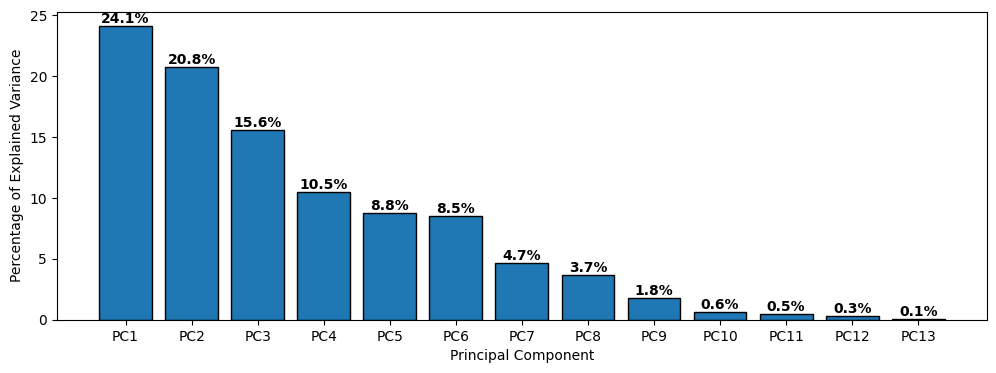

In [17]:
per_var = np.round(pca_nout.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, edgecolor='black')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

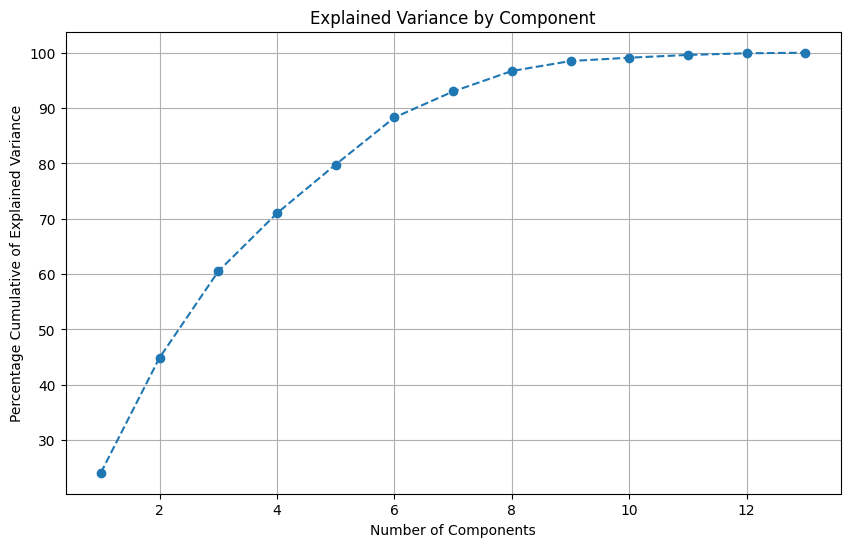

In [18]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

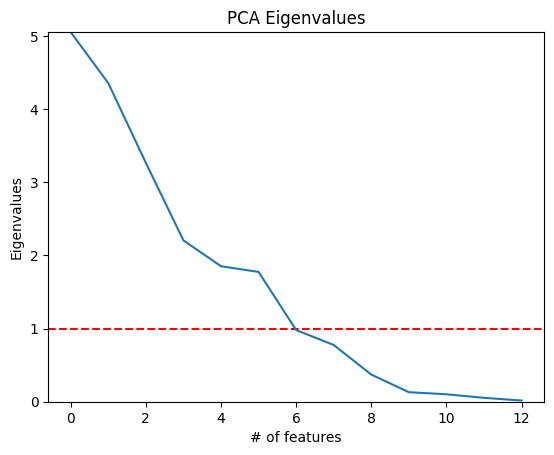

In [19]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(pca_nout.explained_variance_)*100)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color = 'r', linestyle= '--')
plt.plot(pca_nout.explained_variance_*100)
plt.show()

### DBSCAN

In [20]:
num_comp = 4
used_df = normal_values_nout

pca_dbscan_nout = PCA(n_components = num_comp)
pca_dbscan_nout.fit(used_df)
scores_pca_dbscan_nout = pca_dbscan_nout.transform(used_df)

pca_loadings_analysis = pd.DataFrame(
    np.abs(pca_dbscan_nout.components_),
    columns=df_nout.columns,
    index=[f'PC{i+1}' for i in range(pca_dbscan_nout.n_components)]
)

top_features = pca_loadings_analysis.apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

pd.DataFrame(top_features)

,0
PC1,"[tv, building_staff, ac, wifi, breakfast]"
PC2,"[pool, building_staff, breakfast, area_name, tv]"
PC3,"[building_staff, pool, tv, area_name, wifi]"
PC4,"[breakfast, area_name, pool, ac, bathroom]"


In [21]:
epsilon = 0.26
minimum_sample = 5

db = DBSCAN(eps = epsilon, min_samples = minimum_sample).fit(scores_pca_dbscan_nout)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

Number of Clusters :  5
Number of Outliers :  0


In [22]:
dt_nout = pd.DataFrame(scores_pca_dbscan_nout)

dt_nout["segment_dbscan_pca"] = db.labels_
dt_nout["segment"] = dt_nout["segment_dbscan_pca"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4", 4:"Cluster 5", 5:"Cluster 6"})
dt_nout['segment'].value_counts()

segment
Cluster 1    155
Cluster 5     66
Cluster 4     46
Cluster 3     40
Cluster 2     24
Name: count, dtype: int64

In [23]:
dt_nout.rename(columns={0: 'PC1'}, inplace=True)
dt_nout.rename(columns={1: 'PC2'}, inplace=True)
dt_nout.rename(columns={2: 'PC3'}, inplace=True)
dt_nout.rename(columns={3: 'PC4'}, inplace=True)

In [24]:
dt_nout = dt_nout.reset_index()

In [25]:
df_clust_result = df.copy()
df_clust_result['cluster'] = dt_nout['segment']
df_clust_result['PC1'] = dt_nout['PC1']
df_clust_result['PC2'] = dt_nout['PC2']
df_clust_result['PC3'] = dt_nout['PC3']
df_clust_result['PC4'] = dt_nout['PC4']
df_clust_result['cluster'] = df_clust_result['cluster'].fillna('Outlier')

number_of_components = str(num_comp)
number_of_clusters = str(df_clust_result['cluster'].nunique())
df_clust_result.to_csv('dba_'+ number_of_components +'_components_'+ number_of_clusters +'_clust.csv')
df_clust_result

,index,Unnamed: 0,area_name,property_id,property_name,property_type,unit_id,unit_name,unit_type,bedroom,...,comp4,comp5,comp6,comp7,cluster,desc,PC1,PC2,PC3,PC4
0,0,0,Sanur,PR0837,Property no. 42,Guesthouse,UN3085,Mimo,1BR Queen (Mimo),1.0,...,0.003975,0.000915,-0.078112,0.135850,Cluster 1,Guesthouse unit 1BR Queen (Mimo) di Sanur deng...,0.218868,-0.155660,0.010682,-0.005099
1,1,1,Mengwi,PR0791,Property no. 60,Guesthouse,UN3014,Room 4,Regular first floor,1.0,...,-0.036404,-0.097057,-0.044626,0.103566,Cluster 1,Guesthouse unit Regular first floor di Mengwi ...,0.215550,-0.183689,-0.028112,0.054025
2,2,2,Mengwi,PR0791,Property no. 60,Guesthouse,UN3009,Room 12,Loft second floor,1.0,...,-0.037198,-0.096350,-0.043828,0.102842,Cluster 1,Guesthouse unit Loft second floor di Mengwi de...,0.216463,-0.183724,-0.028950,0.054843
3,3,3,Uluwatu,PR0809,Property no. 57,Guesthouse,UN3051,Standard - Room 1,Standard,1.0,...,0.031532,0.069180,-0.100461,0.155616,Cluster 1,Guesthouse unit Standard di Uluwatu dengan 1 k...,0.221325,-0.135154,0.037207,-0.046644
4,4,4,Canggu,PR0650,Property no. 55,Guesthouse,UN2693,1,Guesthouse,1.0,...,-0.259566,-0.336711,-0.266739,0.157439,Cluster 2,Guesthouse unit Guesthouse di Canggu dengan 1 ...,0.363324,0.304665,-0.253975,0.314833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,326,326,Nusa Penida,PR0554,Property no. 88,Resort,UN2742,Room 9,Ocean View,1.0,...,0.138352,-0.000039,-0.127418,-0.129785,Cluster 4,Resort unit Ocean View di Nusa Penida dengan 1...,-0.270338,0.271977,0.131796,0.062296
327,327,327,Nusa Penida,PR0554,Property no. 88,Resort,UN2740,Room 7,Ocean View,1.0,...,0.137615,0.003994,-0.128755,-0.135089,Cluster 4,Resort unit Ocean View di Nusa Penida dengan 1...,-0.268760,0.272115,0.130989,0.059999
328,328,328,Nusa Penida,PR0554,Property no. 88,Resort,UN3035,Room 4,Standard (Extra Bed Available),1.0,...,0.136066,0.048517,-0.153654,-0.193124,Cluster 4,Resort unit Standard (Extra Bed Available) di ...,-0.250537,0.268974,0.130053,0.014782
329,329,329,Bingin,PR0088,Property no. 93,Villa,UN3040,Room 2,Villa Tortoise - Room 2,1.0,...,0.079588,-0.074116,0.309591,-0.020016,Cluster 4,Villa unit Villa Tortoise - Room 2 di Bingin d...,-0.284128,0.235870,0.080703,0.225347


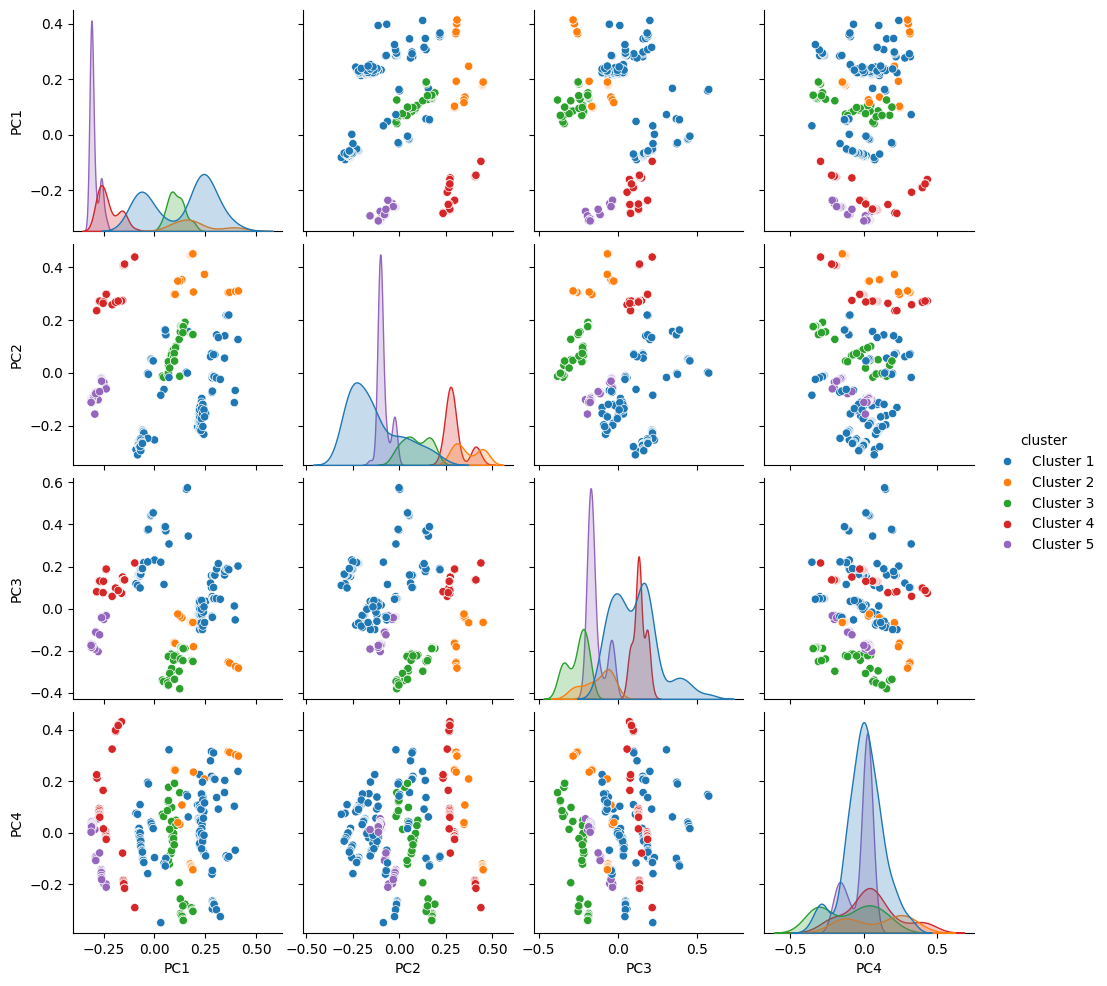

In [26]:
df_clust_plot = df_clust_result.iloc[ :, -num_comp:]
df_clust_plot['cluster'] = df_clust_result['cluster']
sns.pairplot(df_clust_plot[0:], hue='cluster')

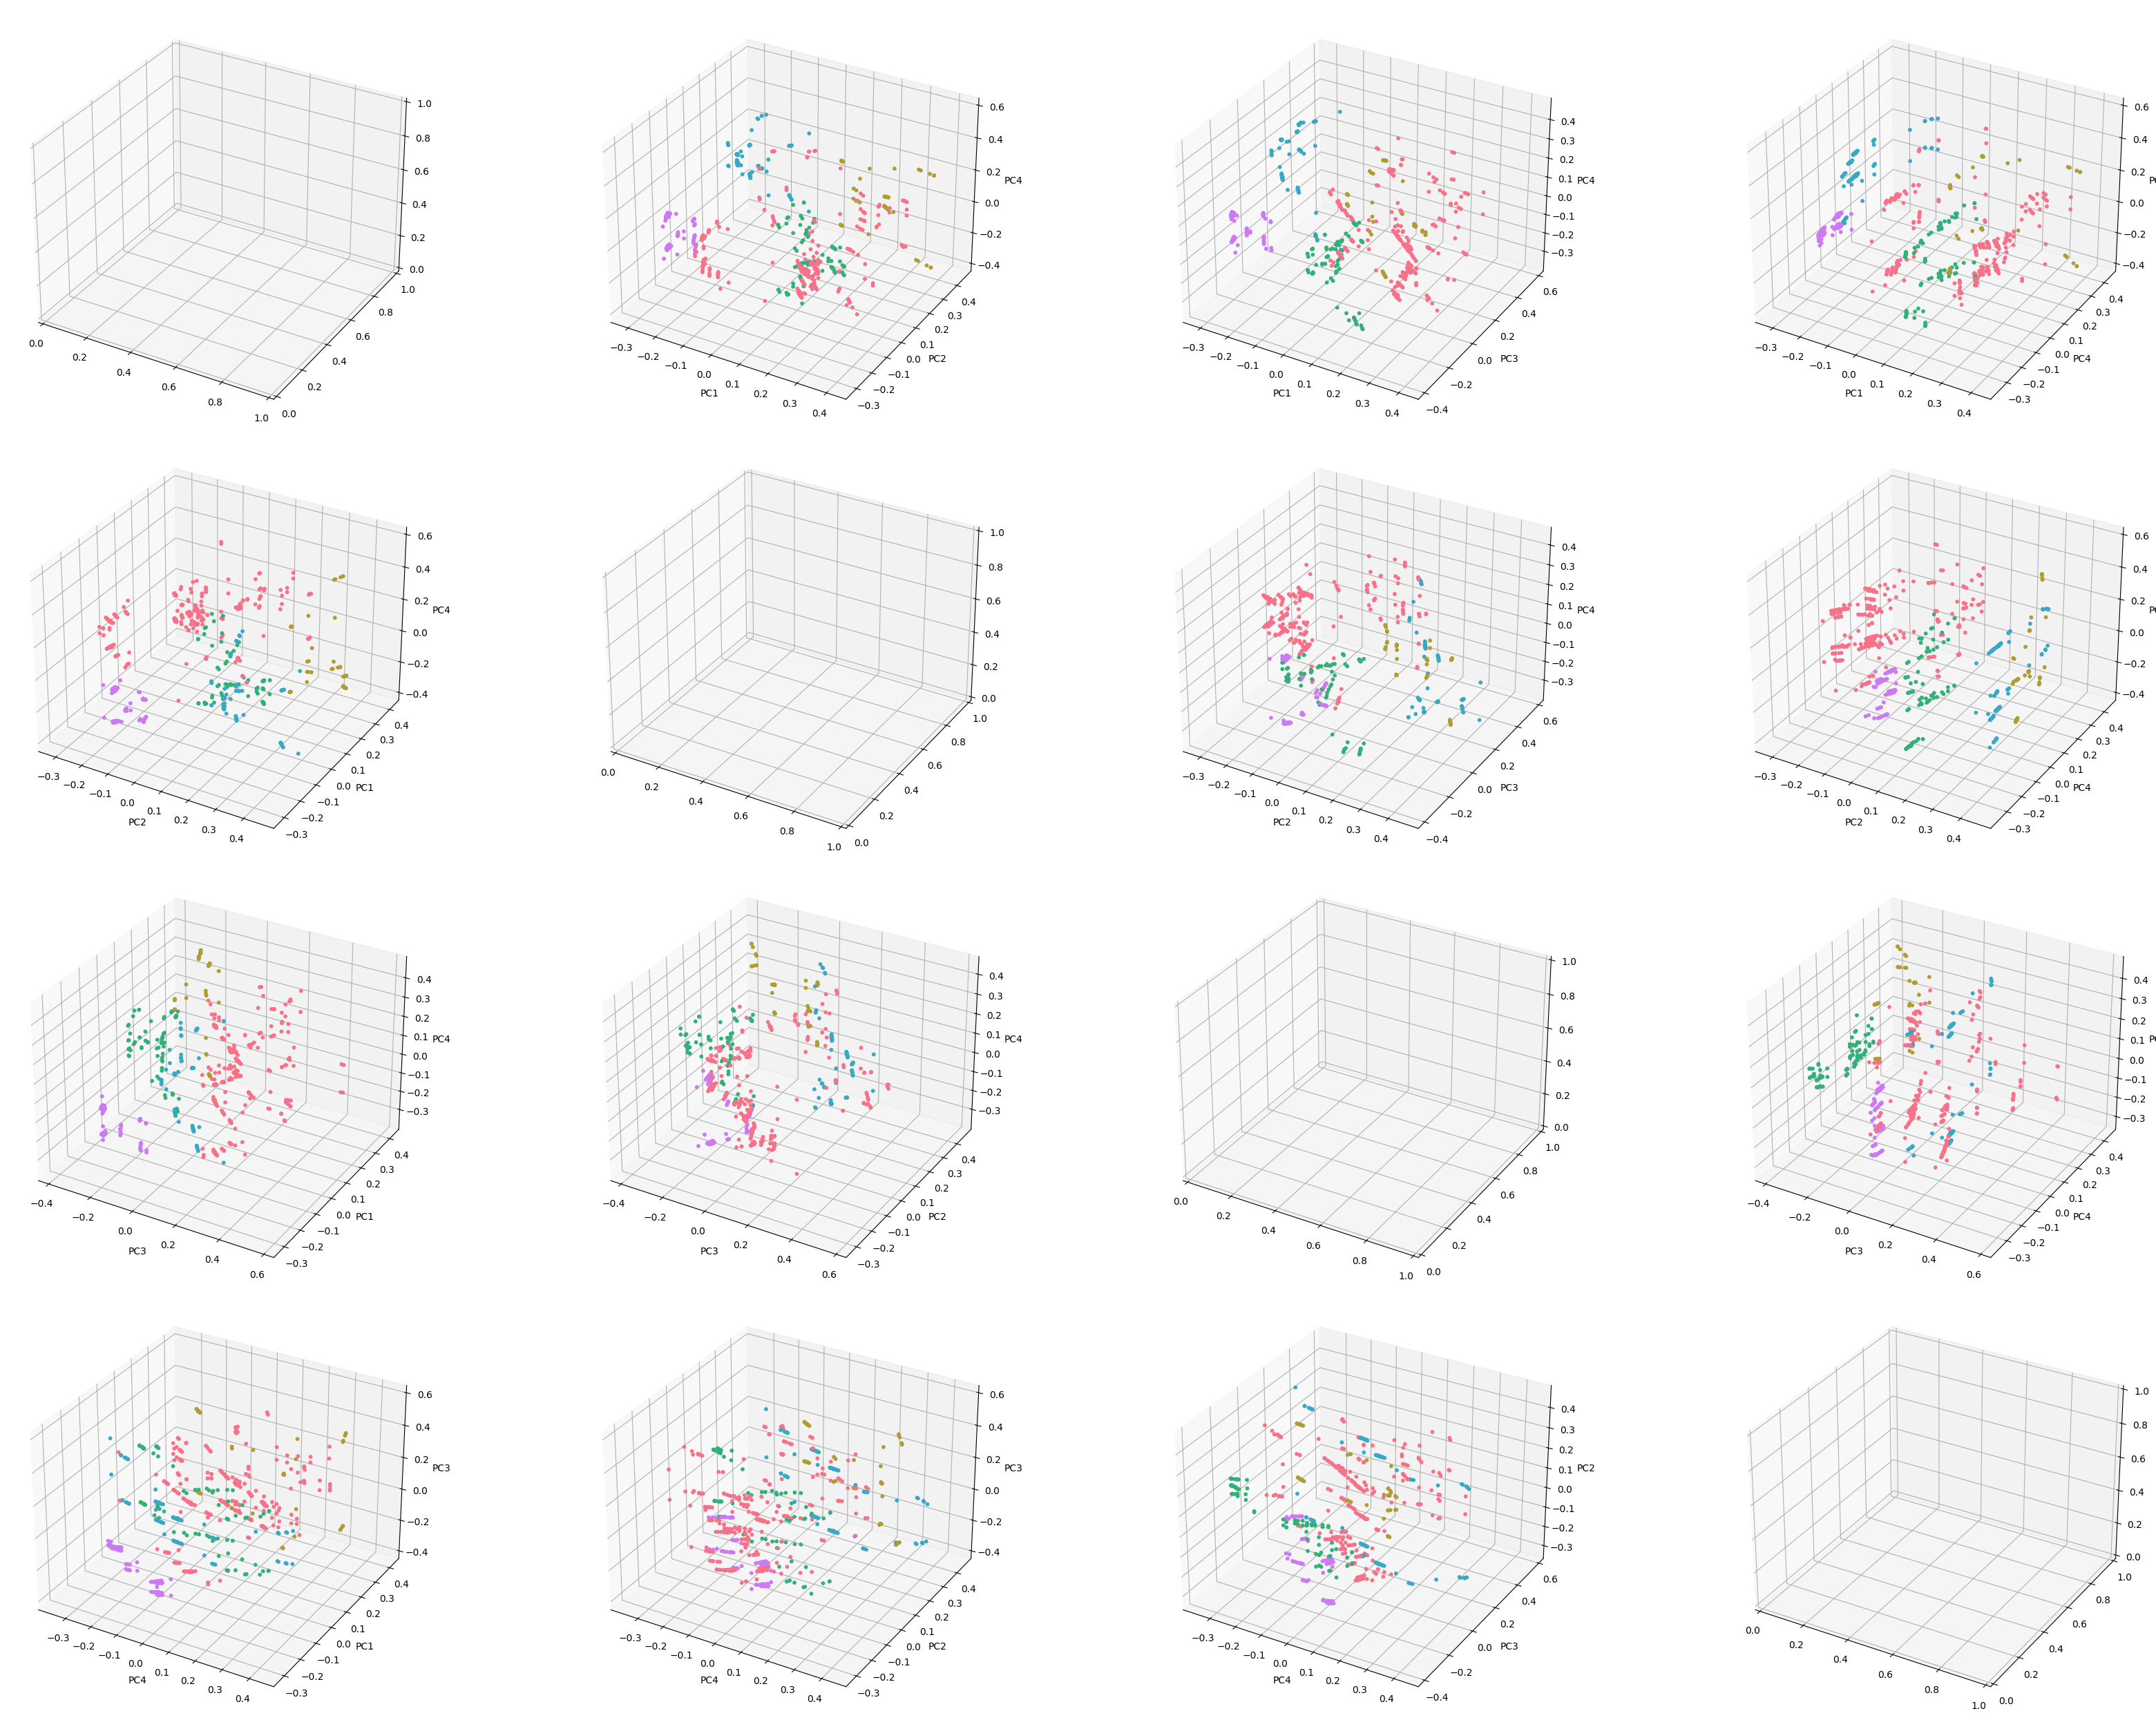

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

comp = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9"]
compca = num_comp

x_cols = comp[:compca]
y_cols = comp[:compca]
z_cols = comp[:compca]

df_clust_result['cluster'] = label_encoder.fit_transform(df_clust_result['cluster'])
c = df_clust_result['cluster']

fig, axs = plt.subplots(compca, compca, figsize=(35, 25), subplot_kw={'projection': '3d'})

# Define color map
cmap = ListedColormap(sns.color_palette("husl", n_colors=len(df_clust_result['cluster'].unique())).as_hex())

for i, x_col in enumerate(x_cols):
    for j, y_col in enumerate(y_cols):
        for k, z_col in enumerate(z_cols):
          if x_col != y_col and y_col != z_col and x_col != z_col:
            ax = axs[i, j]
            x = df_clust_result[x_col]
            y = df_clust_result[y_col]
            z = df_clust_result[z_col]
            sc = ax.scatter(x, y, z, s=40, c=c, marker='.', cmap=cmap, alpha=1)
            ax.set_xlabel(x.name)
            ax.set_ylabel(y.name)
            ax.set_zlabel(z.name)

# Add color bar
# fig.colorbar(sc, ax=axs, shrink=0.6, ticks=df_clust_pca_kmeans['segment'].unique())

# Adjust layout
plt.tight_layout()

# save
plt.savefig("scatter_hue", bbox_inches='tight')

### Evaluation

In [28]:
import numpy as np
from sklearn.metrics import pairwise_distances

def dunn_index(data, labels, metric='euclidean'):
    # Hitung jarak antara pusat cluster dengan metrik yang diberikan
    centroids = []
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    # Hitung jarak intra-cluster minimum
    min_intra_cluster_distance = np.inf
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            distance = pairwise_distances([centroids[i]], [centroids[j]], metric=metric)[0][0]
            if distance < min_intra_cluster_distance:
                min_intra_cluster_distance = distance

    # Hitung jarak inter-cluster maksimum
    max_inter_cluster_distance = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        distance = pairwise_distances(cluster_points, [centroids[i]], metric=metric)[0][0]
        if distance > max_inter_cluster_distance:
            max_inter_cluster_distance = distance

    # Dunn Index adalah rasio antara jarak intra-cluster minimum dan jarak inter-cluster maksimum
    dunn_index = min_intra_cluster_distance / max_inter_cluster_distance
    return dunn_index

def partition_coefficient(labels):
    k = len(np.unique(labels))
    N = len(labels)
    counts = np.bincount(labels)
    pc = np.sum((counts / N) ** 2) / k
    return pc

In [29]:
print(normal_values_nout)

[[0.244 0.026 0.357 ... 0.366 0.    0.366]
 [0.125 0.016 0.363 ... 0.374 0.    0.374]
 [0.125 0.031 0.361 ... 0.375 0.    0.375]
 ...
 [0.261 0.062 0.018 ... 0.    0.    0.   ]
 [0.    0.051 0.436 ... 0.    0.    0.   ]
 [0.148 0.055 0.263 ... 0.    0.    0.   ]]


In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

used_df = normal_values_nout

num_comp = 5
epsilon = 0.35

pca_dbscan_nout = PCA(n_components = num_comp)
pca_dbscan_nout.fit(used_df)
scores_pca_dbscan_nout = pca_dbscan_nout.transform(used_df)

db = DBSCAN(eps = epsilon, min_samples = 5).fit(scores_pca_dbscan_nout)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

silhouette = silhouette_score(normal_values_nout, labels)
db_index = davies_bouldin_score(normal_values_nout, labels)
ch_index = calinski_harabasz_score(normal_values_nout, labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('PC Components           :',num_comp)
print('Epsilon                 :', epsilon)
print('Number of Clusters      :', n_clusters_)
print('Number of Outliers      :', n_noise_)
print(f"Silhouette Score        : {silhouette:.2f}")
print(f"Davies-Bouldin Index    : {db_index:.2f}")
print(f"Calinski-Harabasz Index : {ch_index:.2f}")

pc_score = partition_coefficient(labels)
print(f"Partition Coefficient   : {pc_score:.2f}")

dunn_index_value = dunn_index(normal_values_nout, labels)
print(f"Dunn Index              : {dunn_index_value:.2f}")

PC Components           : 5
Epsilon                 : 0.35
Number of Clusters      : 5
Number of Outliers      : 0
Silhouette Score        : 0.22
Davies-Bouldin Index    : 1.11
Calinski-Harabasz Index : 42.96
Partition Coefficient   : 0.09
Dunn Index              : 0.59
